In [1]:
from yaml import load, Loader
import pandas as pd
from util.analysis_utils import get_all_results, get_group_results, merge_results_patients, prep_patients_df

%load_ext autoreload
%autoreload 2

In [2]:
og_df = pd.read_csv('/vol/aimspace/projects/ukbb/data/tabular/ukb668815_imaging.csv')
patients_df = prep_patients_df(og_df)

/tmp/ipykernel_1582974/1831496144.py:1: DtypeWarning: Columns (20,68,1186,1187,1188,1258,1259,1260,1552,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888,2889,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3

# Baseline Model - 330
## Sex Controlled Test Set Results

In [22]:
cfg = load(open('configs/ukbb_test_sex.yaml', 'r'), Loader=Loader)

test_sex_df = pd.read_csv(cfg['results_path'])
print(cfg['model_desc'])
print(cfg['data_desc'])
test_sex_merged_df = merge_results_patients(test_sex_df, patients_df)

Unimatch Unet 330 Pretrained on UKBB
UKBB Test Data - Sex Controlled -  962 Patients


Number of Patients: 962
Total number of slices: 20802
---
DICE Mean: 92.19
RV Mean: 90.82
MYO Mean: 90.85
LV Mean: 94.91
---


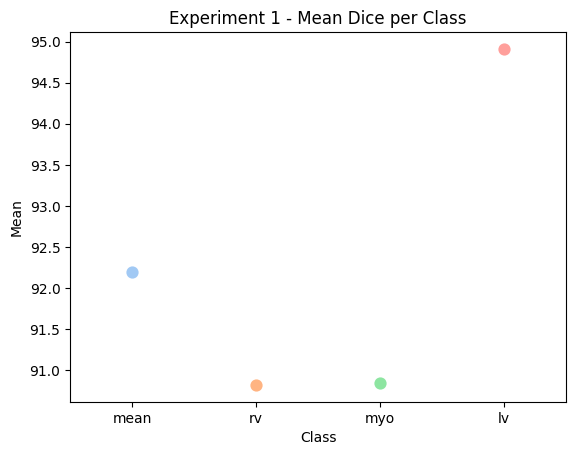

Dice Mean for Male: 92.19
Dice Mean for Female: 92.20


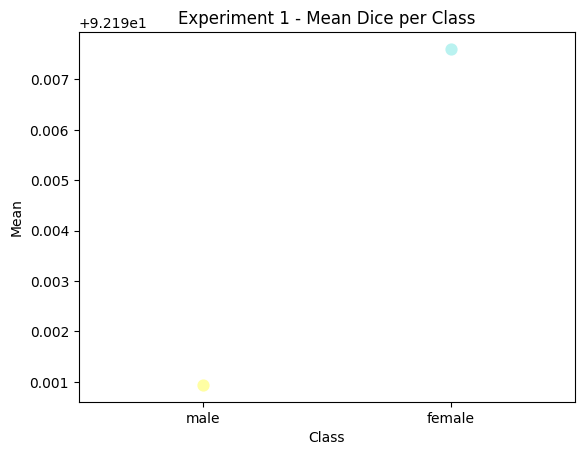

Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  92.387895
1     1002.0  93.030053
2     1003.0  91.992282
Mean: 92.38789520166718
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  91.027562
1     3002.0  91.540833
2     3004.0  92.589511
Mean: 91.02756206061161
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  91.068725
1     4002.0  91.075574
2     4003.0  90.802458
Mean: 91.06872545963455


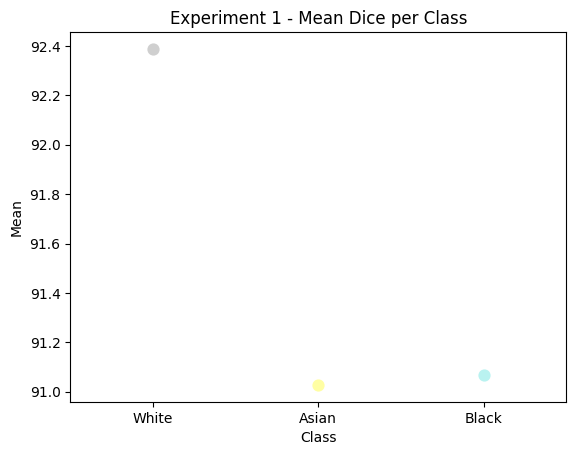

---
Experiment 1 - Number of slices with DICE < 50.0%: 566
---


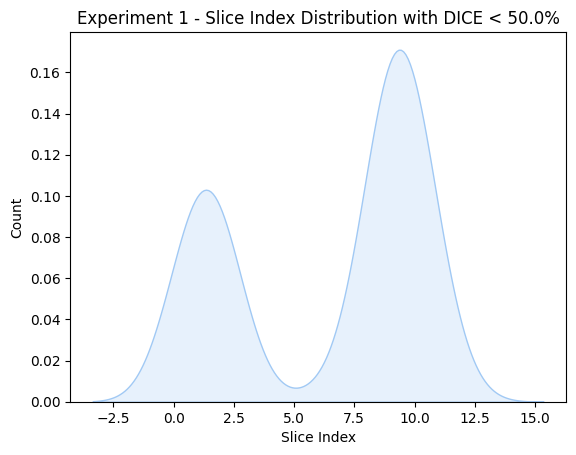

In [31]:
get_all_results(test_sex_merged_df, 'Experiment 1')

Train no control, test sex controlled. Results for sex groups although females count is higher (almost similar). However, results for white ethnic group is a bit higher due to the higher number of train samples for this group.

Most slices with low scores are either near the apex or the base where the segmentation ground truth is not meaningful for the task.

## Ethnicity Controlled Test Set Results

Unimatch Unet 330 Pretrained on UKBB
UKBB Test Data - Ethnicity Controlled -  108 Patients
Number of Patients: 108
Total number of slices: 2300
---
DICE Mean: 91.11
RV Mean: 89.62
MYO Mean: 89.56
LV Mean: 94.14
---


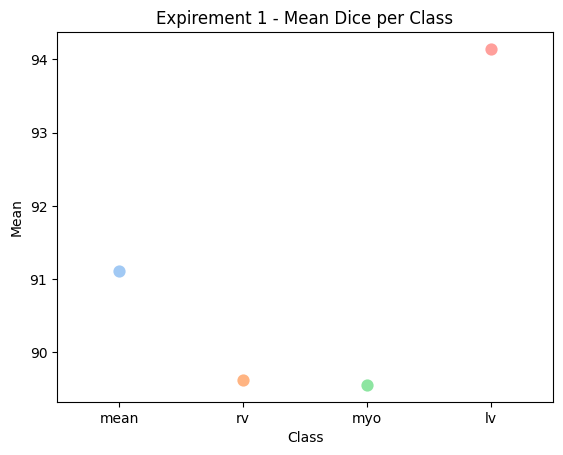

Dice Mean for Male: 91.56
Dice Mean for Female: 90.64


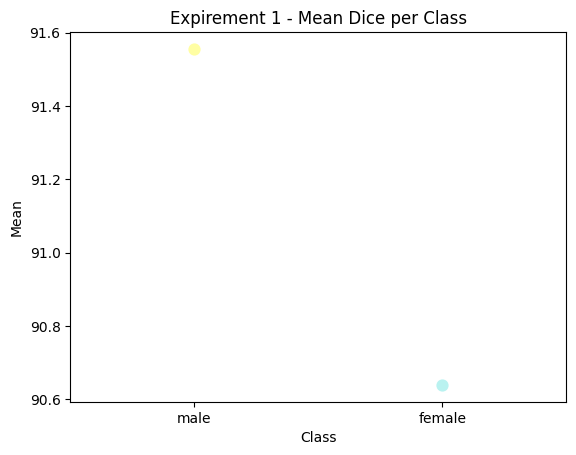

Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  90.748787
1     1003.0  93.223375
Mean: 90.7487866002082
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  90.342943
1     3002.0  92.628563
2     3003.0  93.353328
3     3004.0  92.298133
Mean: 90.34294284146524
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  90.774393
1     4002.0  92.641555
2     4003.0  90.802458
Mean: 90.77439278802615


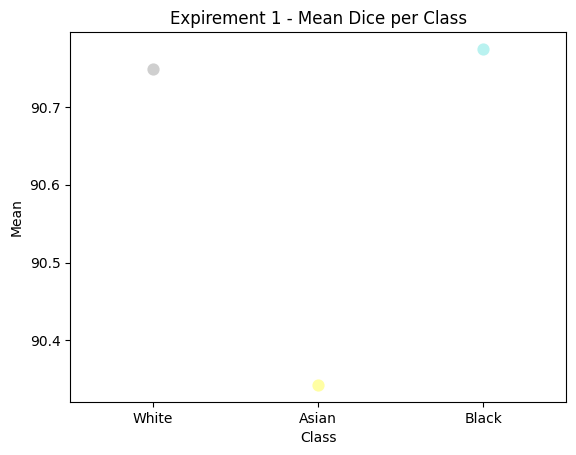

---
Expirement 1 - Number of slices with DICE < 50.0%: 84
---


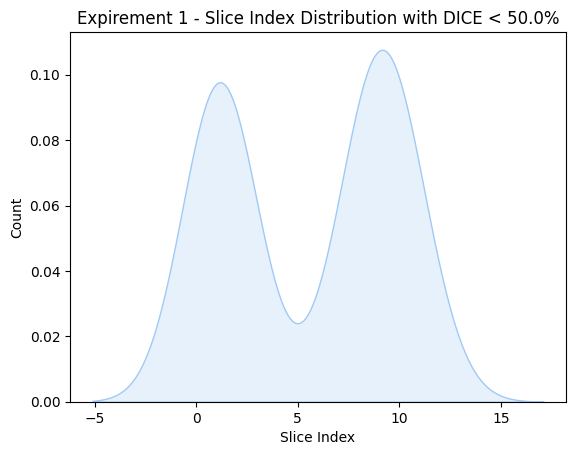

In [34]:
cfg = load(open('configs/ukbb_test_ethn.yaml', 'r'), Loader=Loader)
print(cfg['model_desc'])
print(cfg['data_desc'])
test_ethn_df = pd.read_csv(cfg['results_path'])
test_ethn_merged_df = merge_results_patients(test_ethn_df, patients_df)
get_all_results(test_ethn_merged_df, 'Expirement 1')

Train no control, test ethnicity controlled. Results for female group is lower although the training set contains more females than males. Results for ethnic groups are similar.

# Sex Controlled Model - 80
## Sex Controlled Test Set Results

Unimatch Unet 80 Pretrained on UKBB
UKBB Test Data - Sex Controlled -  962 Patients
Number of Patients: 962
Total number of slices: 20802
---
DICE Mean:  89.16824807598503
RV Mean:  87.01481810037241
MYO Mean:  87.6947376899952
LV Mean:  92.79518843758748
---
Number of slices with DICE < 50.0%: 1089


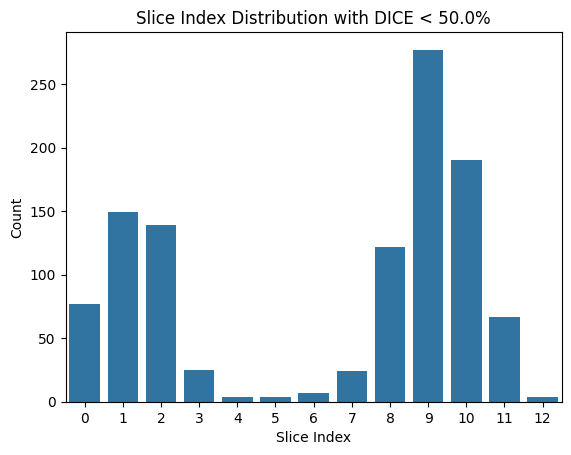

Dice Mean for Male: 89.23649866787736
Dice Mean for Female: 89.09567851190195
Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  89.403407
1     1002.0  89.770477
2     1003.0  88.191612
Mean: 89.40340726472132
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  88.419775
1     3002.0  88.291862
2     3004.0  88.717217
Mean: 88.4197751533251
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  87.683266
1     4002.0  87.797849
2     4003.0  84.909636
Mean: 87.68326627332618


In [7]:
cfg = load(open('configs/ukbb_test_sex.yaml', 'r'), Loader=Loader)

test_sex_df = pd.read_csv(cfg['results_path'])
print(cfg['model_desc'])
print(cfg['data_desc'])
test_sex_merged_df = merge_results_patients(test_sex_df, patients_df)
get_all_results(test_sex_merged_df)
get_group_results(test_sex_merged_df)

Train, test sex controlled. Results per sex groups are similar. Results for white ethnic group is higher than the others due to the large number of samples in the training set. Results for asian group is higher altough the train set has similar numbers. However, test set contains more asian than black.

## Ethnicity Controlled Test Set Results

Unimatch Unet 80 Pretrained on UKBB
UKBB Test Data - Ethnicity Controlled -  108 Patients
Number of Patients: 108
Total number of slices: 2300
---
DICE Mean:  88.19524955964613
RV Mean:  86.14265886194471
MYO Mean:  86.3490890077784
LV Mean:  92.09400080921527
---
Number of slices with DICE < 50.0%: 143


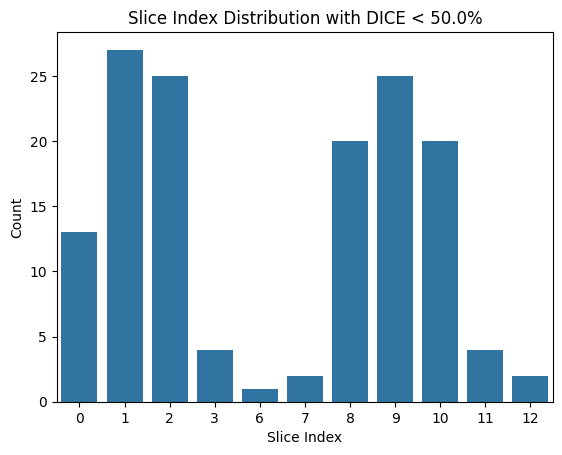

Dice Mean for Male: 88.81222867998665
Dice Mean for Female: 87.55420387787389
Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  87.449473
1     1003.0  92.132511
Mean: 87.44947343784078
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  88.490951
1     3002.0  88.599065
2     3003.0  91.023190
3     3004.0  90.056745
Mean: 88.49095122499973
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  87.484561
1     4002.0  89.383138
2     4003.0  84.909636
Mean: 87.4845613397525


In [8]:
cfg = load(open('configs/ukbb_test_ethn.yaml', 'r'), Loader=Loader)
print(cfg['model_desc'])
print(cfg['data_desc'])
test_ethn_df = pd.read_csv(cfg['results_path'])
test_ethn_merged_df = merge_results_patients(test_ethn_df, patients_df)
get_all_results(test_ethn_merged_df)
get_group_results(test_ethn_merged_df)

Train sex controlled, test ethnicity controlled. Performance for males is better although both train, sex have same or similar number of samples per sex group. Performance for Asian group is better although white is more.

# Ethnicity Controlled Model - 26
## Sex Controlled Test Set Results

Unimatch Unet 26 Pretrained on UKBB
UKBB Test Data - Sex Controlled -  962 Patients
Number of Patients: 962
Total number of slices: 20802
---
DICE Mean:  85.39758762827562
RV Mean:  82.91028690130132
MYO Mean:  83.16034469667314
LV Mean:  90.12213128685244
---
Number of slices with DICE < 50.0%: 1647


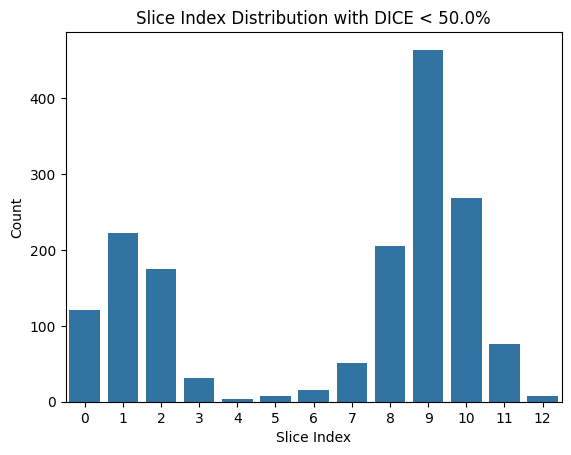

Dice Mean for Male: 85.42427626266239
Dice Mean for Female: 85.36921010788026
Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  85.640842
1     1002.0  86.269752
2     1003.0  83.837769
Mean: 85.64084241960539
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  84.339575
1     3002.0  84.664688
2     3004.0  85.126591
Mean: 84.33957463165443
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  84.480597
1     4002.0  84.042581
2     4003.0  83.432279
Mean: 84.4805972054237


In [10]:
cfg = load(open('configs/ukbb_test_sex.yaml', 'r'), Loader=Loader)
test_sex_df = pd.read_csv(cfg['results_path'])
print(cfg['model_desc'])
print(cfg['data_desc'])
test_sex_merged_df = merge_results_patients(test_sex_df, patients_df)
get_all_results(test_sex_merged_df)
get_group_results(test_sex_merged_df)

Train ethnicity controlled, test sex controlled. Overall performance of the model on this test dataset is low. Performance is similar for sex groups. Performance is better for white ethnic group altough the train set is controlled for ethnicity. However, the test set has more white samples.

## Ethnicity Controlled Test Set Results

Unimatch Unet 26 Pretrained on UKBB
UKBB Test Data - Ethnicity Controlled -  108 Patients
Number of Patients: 108
Total number of slices: 2300
---
DICE Mean:  84.60136811106325
RV Mean:  82.35139979994203
MYO Mean:  81.8706675331626
LV Mean:  89.58203700008517
---
Number of slices with DICE < 50.0%: 207


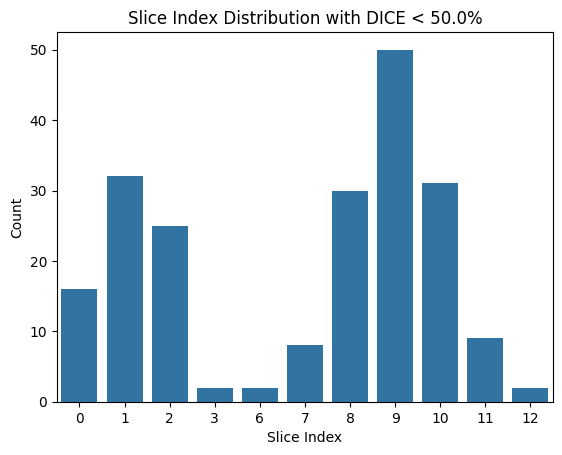

Dice Mean for Male: 85.00781726520505
Dice Mean for Female: 84.17906455729184
Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  83.984577
1     1003.0  88.705246
Mean: 83.98457743124372
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  83.837729
1     3002.0  86.102200
2     3003.0  87.159613
3     3004.0  88.816999
Mean: 83.83772917388234
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  84.022772
1     4002.0  86.124602
2     4003.0  83.432279
Mean: 84.0227719638797


In [11]:
cfg = load(open('configs/ukbb_test_ethn.yaml', 'r'), Loader=Loader)
print(cfg['model_desc'])
print(cfg['data_desc'])
test_ethn_df = pd.read_csv(cfg['results_path'])
test_ethn_merged_df = merge_results_patients(test_ethn_df, patients_df)
get_all_results(test_ethn_merged_df)
get_group_results(test_ethn_merged_df)

Train, test ethnicity controlled, Overall performance is low. Performance for male group is higher even though the train contains similar number per sex group. However, asian group contains more males which could contribute to that. Performance per ethnic group is similar. 

# Sex Ethnicity Controlled Model - 18
## Sex Controlled Test Set Results

Unimatch Unet 18 Pretrained on UKBB
UKBB Test Data - Sex Controlled -  962 Patients
Number of Patients: 962
Total number of slices: 20802
---
DICE Mean:  82.99535429763473
RV Mean:  79.51890997445449
MYO Mean:  80.96065609579091
LV Mean:  88.50649682265882
---
Number of slices with DICE < 50.0%: 2060


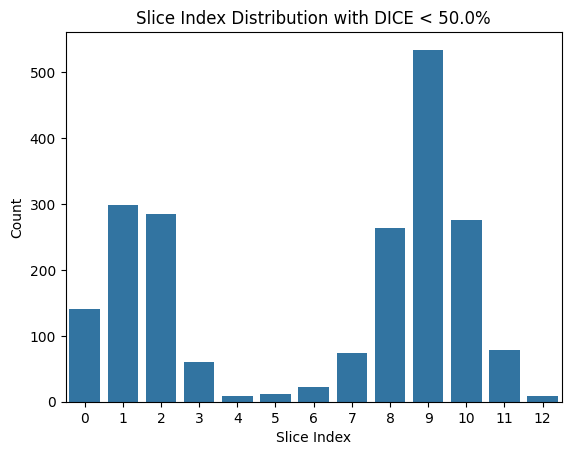

Dice Mean for Male: 83.12685526251565
Dice Mean for Female: 82.85553180769986
Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  83.307121
1     1002.0  83.864106
2     1003.0  82.199034
Mean: 83.3071206356194
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  81.435921
1     3002.0  81.390775
2     3004.0  82.639082
Mean: 81.43592121779425
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  81.401767
1     4002.0  81.636207
2     4003.0  80.881208
Mean: 81.40176670419471


In [12]:
cfg = load(open('configs/ukbb_test_sex.yaml', 'r'), Loader=Loader)
test_sex_df = pd.read_csv(cfg['results_path'])
print(cfg['model_desc'])
print(cfg['data_desc'])
test_sex_merged_df = merge_results_patients(test_sex_df, patients_df)
get_all_results(test_sex_merged_df)
get_group_results(test_sex_merged_df)

Train sex, ethnicity controlled. Test sex controlled. overall perfomance is low, could need more epochs. Sex groups have similar performance. White group performance is higher, altough train is controlled however, test has more white.

## Ethnicity Controlled Test Set Results

Unimatch Unet 18 Pretrained on UKBB
UKBB Test Data - Ethnicity Controlled -  108 Patients
Number of Patients: 108
Total number of slices: 2300
---
DICE Mean:  81.69076645818853
RV Mean:  78.82714208639767
MYO Mean:  79.06606477158795
LV Mean:  87.17909251657998
---
Number of slices with DICE < 50.0%: 269


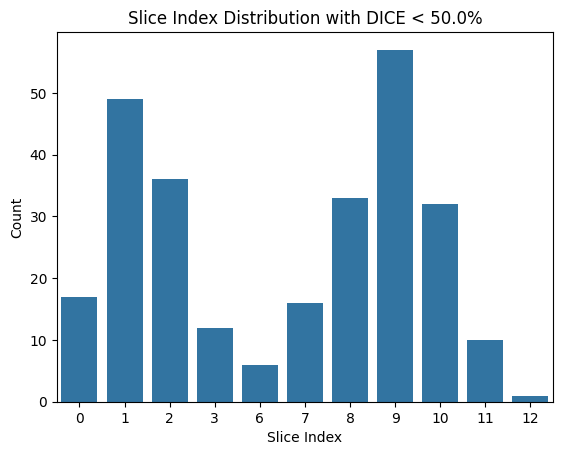

Dice Mean for Male: 82.64540241590466
Dice Mean for Female: 80.69889292765369
Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  81.023799
1     1003.0  84.890592
Mean: 81.02379912621825
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  80.698685
1     3002.0  83.256254
2     3003.0  81.336977
3     3004.0  86.739228
Mean: 80.69868463926203
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  81.272517
1     4002.0  83.594209
2     4003.0  80.881208
Mean: 81.27251711157179


In [13]:
cfg = load(open('configs/ukbb_test_ethn.yaml', 'r'), Loader=Loader)
print(cfg['model_desc'])
print(cfg['data_desc'])
test_ethn_df = pd.read_csv(cfg['results_path'])
test_ethn_merged_df = merge_results_patients(test_ethn_df, patients_df)
get_all_results(test_ethn_merged_df)
get_group_results(test_ethn_merged_df)

Train sex, ethnicity controlled. Test ethnicity controlled. overall perfomance is low, could need more epochs. Male has higher performance, although train is controlled and test has similar numbers. Asian group performance is slightly worse although both train, test are controlled.